### This dataset, which seeks to determine if employee attrition can be predicted, contains (fabricated) employee data over a 10 year time period.

While I will not be doing any predictions, I will explore this dataset to try and answer the question of which attrition may be causing this company the most pain? 

In [1]:
# BASIC PACKAGES
import pandas as pd
import numpy as np
import missingno as msno

# VISUALIZATION PACKAGES
import scikitplot as skplt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1= pd.read_csv('MFG10YearTerminationData.csv')

In [10]:
df1.shape

(49653, 18)

In [80]:
# CONFIRM NO MISSING VALUES

df1.isna().sum()

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

In [3]:
# DTYPES SHOW SOME CATEGORICAL FEATURES ARE READ AS NUMERIC

df1.dtypes

EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
STATUS                 object
BUSINESS_UNIT          object
dtype: object

In [65]:
# CAST OBJECT TYPES AS NEEDED

df1.loc[:,'EmployeeID']= df1.EmployeeID.astype(object)
df1.loc[:,'store_name']= df1.EmployeeID.astype(object)
df1.loc[:,'STATUS_YEAR']= df1.EmployeeID.astype(object)

In [4]:
df1.head(10)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
5,1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
6,1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
7,1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
8,1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE
9,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


In [66]:
# DESCRIBE NUMERIC FEATURES

df1.describe()

,age,length_of_service
count,49653.000000,49653.000000
mean,42.077035,10.434596
std,12.427257,6.325286
min,19.000000,0.000000
25%,31.000000,5.000000
50%,42.000000,10.000000
75%,53.000000,15.000000
max,65.000000,26.000000


In [75]:
# DESCRIBE CATEGORICAL FEATURES

df1.describe(exclude=np.number).T

,count,unique,top,freq
EmployeeID,49653,6284,1318,10
recorddate_key,49653,130,12/31/2013 0:00,5215
birthdate_key,49653,5342,3/23/1973,40
orighiredate_key,49653,4415,9/25/2006,50
terminationdate_key,49653,1055,1/1/1900,42450
city_name,49653,40,Vancouver,11211
department_name,49653,21,Meats,10269
job_title,49653,47,Meat Cutter,9984
store_name,49653,6284,1318,10
gender_short,49653,2,F,25898


In [68]:
# ISOLATE EMPLOYEES WHO CHURNED, THE TARGET CLASS OF THIS DATASET

df_churn= df1[df1['STATUS'] == 'TERMINATED']
df_churn

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
48168,1338,2/1/2009 0:00,2/16/1949,9/20/1989,2/16/2009,60,19,Vancouver,Training,"Director, Training",1338,M,Male,Retirement,Voluntary,1338,TERMINATED,HEADOFFICE
48169,1339,2/1/2014 0:00,2/19/1949,9/22/1989,2/19/2014,65,24,Nelson,Store Management,Store Manager,1339,F,Female,Retirement,Voluntary,1339,TERMINATED,STORES
48170,1340,2/1/2009 0:00,2/19/1949,9/22/1989,2/19/2009,60,19,Kelowna,Store Management,Store Manager,1340,M,Male,Retirement,Voluntary,1340,TERMINATED,STORES
48171,1341,2/1/2009 0:00,2/21/1949,9/23/1989,2/21/2009,60,19,Vancouver,Labor Relations,"Director, Labor Relations",1341,M,Male,Retirement,Voluntary,1341,TERMINATED,HEADOFFICE
48172,1343,2/1/2014 0:00,2/24/1949,9/25/1989,2/24/2014,65,24,Victoria,Store Management,Store Manager,1343,F,Female,Retirement,Voluntary,1343,TERMINATED,STORES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,8258,M,Male,Layoff,Involuntary,8258,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,8264,F,Female,Resignaton,Voluntary,8264,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,8279,F,Female,Layoff,Involuntary,8279,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,8296,F,Female,Resignaton,Voluntary,8296,TERMINATED,STORES


In [77]:
# DESCRIBE CATEGORICAL FEATURES FOR CHURNED EMPLOYEES

df_churn.describe(exclude=np.number).T

,count,unique,top,freq
EmployeeID,1485,1485,1338,1
recorddate_key,1485,120,12/1/2014 0:00,152
birthdate_key,1485,1358,2/14/1946,3
orighiredate_key,1485,1290,11/4/1989,4
terminationdate_key,1485,1054,12/30/2014,144
city_name,1485,40,Vancouver,296
department_name,1485,20,Meats,377
job_title,1485,36,Meat Cutter,354
store_name,1485,1485,1338,1
gender_short,1485,2,F,915


Some initial observations:
1. About 60-65% of the churned employees are Female. Is this representative of the population?
2. About 60% of the employees churned due to Retirement. What are the ages of those retiring? Do we see anything unexpected?
3. About 90% of the employees churned voluntarily. What are the main reasons?
4. The Meat department workers churn the most

In [113]:
#sns.countplot
print("Percentage of Females in population:", 
      round(len(df1[df1.gender_full == 'Female']) / len(df1),2),"%")
print("Percentage of Females in churned population:", 
      round(len(df_churn[df_churn.gender_full == 'Female']) / len(df_churn),2),"%")

Percentage of Females in population: 0.52 %
Percentage of Females in churned population: 0.62 %


Females seem to churn a bit more than their proportion of the population, but the discrepancy is not very concerning. Let's check the age distribution of all employees (green), with an overlay (blue) of those who churned

<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age (Years)', ylabel='Count in Bin'>

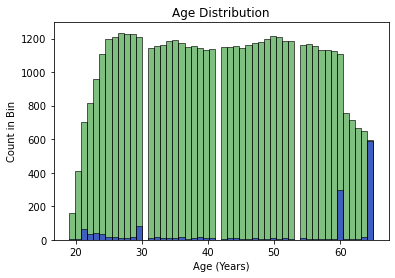

In [136]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_xlabel('Age (Years)')
ax.set_ylabel('Count in Bin')
ax.set_title('Age Distribution')
sns.histplot(x='age', data=df1, bins=50, color='green', alpha=0.5)
sns.histplot(x='age', data=df_churn, bins=50, color='blue', alpha=0.5)

Let's take a closer look at the churn for those who didn't retire

<AxesSubplot:title={'center':'Age Distribution of non-Retiree Churn'}, xlabel='Age (Years)', ylabel='Count in Bin'>

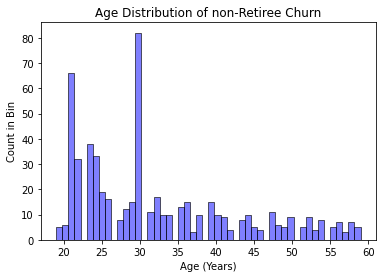

In [138]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_xlabel('Age (Years)')
ax.set_ylabel('Count in Bin')
ax.set_title('Age Distribution of non-Retiree Churn')
sns.histplot(x='age', data=df_churn[df_churn.age < 60], bins=50, color='blue', alpha=0.5)

We see high attrition from the younger age groups, 20-30. Now let's look at the relationship between non-retiree churned employees as their job department and title. 

In [143]:
# CHECK AVG AGE AND TENURE OF EMPLOYEES BY DEPARTMENT AND JOB TITLE, AND STATUS

pivot1 = pd.pivot_table(df1, values=['length_of_service', 'age'], 
                        columns='STATUS', index=['department_name','job_title'], aggfunc=np.mean)
pivot1

age             \
STATUS                                                     ACTIVE TERMINATED   
department_name        job_title                                               
Accounting             Accounting Clerk                 60.000000  65.000000   
                       Director, Accounting             60.500000  65.000000   
Accounts Payable       Accounts Payable Clerk           59.545455  63.333333   
                       Director, Accounts Payable       60.500000  65.000000   
Accounts Receiveable   Accounts Receiveable Clerk       59.230769  62.500000   
                       Director, Accounts Receivable    60.500000  65.000000   
Audit                  Auditor                          58.823529  61.666667   
                       Director, Audit                  58.000000  60.000000   
Bakery                 Baker                            40.884447  49.582418   
                       Bakery Manager                   58.261364  61.857143   
Compensation           Compensation Analyst             58.823529  61.666667   
                       Director, Compensation           58.000000  60.000000   
Customer Service       Cashier                          31.175700  26.387097   
                       Customer Service Manager         57.708904  61.928571   
Dairy                  Dairy Manager                    60.500000  65.000000   
                       Dairy Person                     35.633690  47.747368   
Employee Records       Benefits Admin                   60.000000  63.000000   
                       Director, Employee Records       60.500000  65.000000   
Executive              CEO                              56.500000        NaN   
                       CHief Information Officer        54.500000        NaN   
                       Exec Assistant, Finance          49.500000        NaN   
                       Exec Assistant, Human Resources  55.500000        NaN   
                       Exec Assistant, Legal Counsel    46.500000        NaN   
                       Exec Assistant, VP Stores        48.500000        NaN   
                       Legal Counsel                    55.500000        NaN   
                       VP Finance                       52.500000        NaN   
                       VP Human Resources               51.500000        NaN   
                       VP Stores                        53.500000        NaN   
HR Technology          Director, HR Technology          60.500000  65.000000   
                       HRIS Analyst                     60.106383  62.750000   
Information Technology Systems Analyst                  58.000000  60.000000   
Investment             Director, Investments            58.000000  60.000000   
                       Investment Analyst               58.823529  61.666667   
Labor Relations        Director, Labor Relations        58.000000  60.000000   
                       Labor Relations Analyst          59.600000  62.000000   
Legal                  Corporate Lawyer                 59.428571  61.666667   
Meats                  Meat Cutter                      52.256282  61.587571   
                       Meats Manager                    58.503817  62.521739   
Processed Foods        Processed Foods Manager          57.670330  60.812500   
                       Shelf Stocker                    32.503785  31.864865   
Produce                Produce Clerk                    47.461607  60.015060   
                       Produce Manager                  58.618677  61.952381   
Recruitment            Director, Recruitment            48.500000        NaN   
                       Recruiter                        60.222222  63.750000   
Store Management       Store Manager                    58.016667  62.677419   
Training               Director, Training               58.000000  60.000000   
                       Trainer                          59.818182  62.500000   

                                                       length

We can see that nearly across the board, the Avg age of employees when they are terminated is older than those who were still Active at the end of the study. The exception to this is Cashier and Shelf Stocker. Dairy Person and Baker also were occupations with a younger-than-retirement avg age. 

Let's see the same table, but excluding retirees

In [148]:
# USE DF_CHURN TO DROP NON-TERMINATED EMPLOYEES AND DROP STATUS AS A COLUMN TO CONSOLIDATE

pivot2 = pd.pivot_table(df_churn[df_churn.termreason_desc != 'Retirement'], values=['length_of_service', 'age'], 
                        index=['department_name','job_title'], aggfunc=np.mean, sort=True)
pivot2

age  length_of_service
department_name  job_title                                             
Bakery           Baker                     36.851064           8.276596
                 Bakery Manager            57.250000          20.750000
Customer Service Cashier                   26.113821           3.256098
                 Customer Service Manager  54.000000          18.666667
Dairy            Dairy Person              35.790909           8.263636
HR Technology    HRIS Analyst              57.000000          17.000000
Meats            Meat Cutter               48.964286          15.267857
                 Meats Manager             60.750000          22.750000
Processed Foods  Processed Foods Manager   53.250000          18.000000
                 Shelf Stocker             30.464789           5.253521
Produce          Produce Clerk             41.511628          10.720930
                 Produce Manager           59.000000          21.500000
Store Management Store Manager             62.571429          23.285714

Cashier is definitely where we see our lowest age and tenure, with Shelf Stocker behind that, and Baker and Dairy Person tied behind those two. Let's check the termination reason behind these departures

In [154]:
# SORT BY TERM_REASON, THEN JOB_TITLE

df_churn[df_churn.termreason_desc != 'Retirement'] \
                .groupby(['termreason_desc','job_title'])['EmployeeID'].count()

termreason_desc  job_title               
Layoff           Baker                        17
                 Bakery Manager                4
                 Cashier                      67
                 Customer Service Manager      3
                 Dairy Person                 46
                 Meat Cutter                  27
                 Meats Manager                 4
                 Processed Foods Manager       3
                 Produce Clerk                16
                 Produce Manager               4
                 Shelf Stocker                18
                 Store Manager                 6
Resignaton       Baker                        30
                 Cashier                     179
                 Dairy Person                 64
                 HRIS Analyst                  1
                 Meat Cutter                  29
                 Processed Foods Manager       1
                 Produce Clerk                27
                 Shelf Stoc

Let's focus a bit mor on the Resignation reason, since those are often unexpected and are often regretful. Resignations pose a serious cost to companies in the form of hiring costs and short-handedness on the front lines

Let's look at resignation count by job title

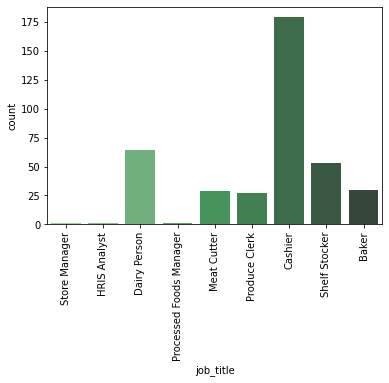

In [160]:
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = sns.countplot(x='job_title', data=df_churn[df_churn.termreason_desc == 'Resignaton'], 
                   palette='Greens_d')
plt.xticks(rotation=90)
plt.show()

The high totals for these position resignations could just be proportional to the amount of these roles in the company. Do these roles actually churn at a higher rate than other roles? 

In [232]:
# COUNTS OF JOBS WHICH RESIGNED

count_resigs= df_churn[df_churn.termreason_desc == 'Resignaton'] \
                       .job_title.value_counts()
df_resigs= pd.DataFrame(count_resigs).sort_index()

,job_title
Baker,30
Cashier,179
Dairy Person,64
HRIS Analyst,1
Meat Cutter,29
Processed Foods Manager,1
Produce Clerk,27
Shelf Stocker,53
Store Manager,1


In [207]:
# GATHER FIRST INDEX OF EACH UNIQUE EMPLOYEEID
job_index= [list(df1.EmployeeID).index(i) for i in df1.EmployeeID.unique()]

In [235]:
# CREATE NEW DF WITH SUBSET BASED ON JOB_INDEX
# COUNT OF JOBS WITH TITLES MATCHING RESIGNED TO GET TOTAL VALUES

df_unique= df1.iloc[job_index]
resig_job_titles= list(df_churn[df_churn.termreason_desc == 'Resignaton'] \
                       .job_title.value_counts().index)
count_tot_jobs= df_unique[df_unique.job_title.isin(resig_job_titles)].job_title.value_counts()
df_tot_jobs= pd.DataFrame(count_tot_jobs).sort_index()

In [243]:
# CREATE NEW DATASET WITH COUNTS OF JOBS THAT RESIGNED VS TOTAL COUNT OF THOSE JOBS

df_resig_perc= pd.concat([df_resigs, df_tot_jobs], axis=1)
df_resig_perc.columns = ['resignations', 'tot_jobs']
df_resig_perc['resig_perc'] = df_resig_perc.resignations / df_resig_perc.tot_jobs
df_resig_perc 

,resignations,tot_jobs,resig_perc
Baker,30,865,0.034682
Cashier,179,1158,0.154577
Dairy Person,64,1032,0.062016
HRIS Analyst,1,8,0.125000
Meat Cutter,29,1218,0.023810
Processed Foods Manager,1,32,0.031250
Produce Clerk,27,1027,0.026290
Shelf Stocker,53,704,0.075284
Store Manager,1,35,0.028571


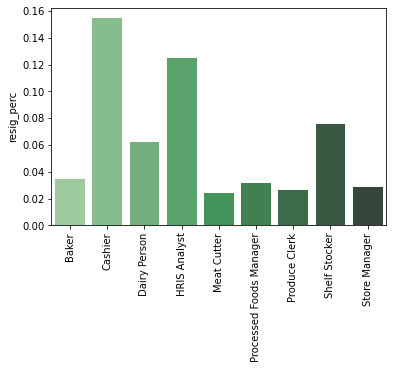

In [247]:
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = sns.barplot(x= df_resig_perc.index, y='resig_perc', data=df_resig_perc, palette='Greens_d')
plt.xticks(rotation=90)
plt.show()

From this visualization we can see that Cashiers turnover at a much higher rate of 15%. This is concerning, considering this is nearly the most common job at this company, just behind Meat Cutter, which turns over at a rate of <2.5%. 

Clearly, there is some work to do at this company to understand what is causing their Cashiers to turn over so frequently, and evaluate what magnitude business problem this presents. 